# Análisis Exploratorio de los datos

Incluir una breve explicación de por que realizamos un EDA

Importaciones

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import datetime
import matplotlib.pyplot as plt

from scipy.stats import bartlett, pearsonr
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn import metrics, svm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#from tensorflow.keras import datasets, layers, models
#import matplotlib.pyplot as plt



## Mount Drive Gaston

In [ ]:
# mount drive Gastón
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

# Abrir el path concreto
#Insert here your own path. 
!ls
%cd "/content/drive/MyDrive/Aprendizaje"
!ls

Mounted at /content/drive/
drive  sample_data
[Errno 2] No such file or directory: '/content/drive/MyDrive/Aprendizaje'
/content
drive  sample_data


## Mount Drive Adela

In [2]:
# mount drive Adela
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

# Abrir el path concreto
#Insert here your own path. 
!ls
%cd "/content/drive/MyDrive/6-2-C/AA/P1/Data"
!ls


Mounted at /content/drive/
drive  sample_data
/content/drive/MyDrive/6-2-C/AA/P1/Data
comp_st27ns1.txt.bz2  disp_st27ns1.txt.bz2


Cargamos los datos Disponibles y de Competición

In [3]:
disp_df = pd.read_csv("disp_st27ns1.txt.bz2",
 compression="bz2",
index_col=0)
comp_df = pd.read_csv("comp_st27ns1.txt.bz2",
 compression="bz2",
index_col=0)

Previo a la división de los datos en conjuntos de Entrenamiento, Set y Validación, se ha de hacer una exploración de los datos con el objetivo de comprobar la forma en la que se presentan. Para ello hemos investigado el tipo de variables con el cual trabajaremos, si existen valores nulos, filas duplicadas o incluso la correlación de los datos presentes. 
Previo a la división de los datos en conjuntos de Entrenamiento, Set y Validación, se ha de hacer una exploración de los datos con el objetivo de comprobar la forma en la que se presentan. Para ello hemos investigado el tipo de variables con el cual trabajaremos, si existen valores nulos, filas duplicadas o incluso la correlación de los datos presentes. 


### Eliminación de filas duplicadas. 
Como es posible observar, no existe ninguna fila duplicada.

In [4]:
disp_df_unicos = disp_df.drop_duplicates()
disp_df_unicos.shape

print(disp_df.iloc[:, -1:])

         salida
V1     10814100
V2      3524700
V3      2262300
V4      2414100
V5      8925600
...         ...
V4376   2586300
V4377   7096500
V4378  10694700
V4379  11154900
V4380  11047800

[4380 rows x 1 columns]


### Evaluación de valores nulos. 
Como es posible observar, no existe ningun dato nulo en el conjunto de datos.

In [ ]:
print(disp_df.isnull().values.any())

False


### Evaluación de correlación de variables

Estudiar la correlación de las variables (TBD)

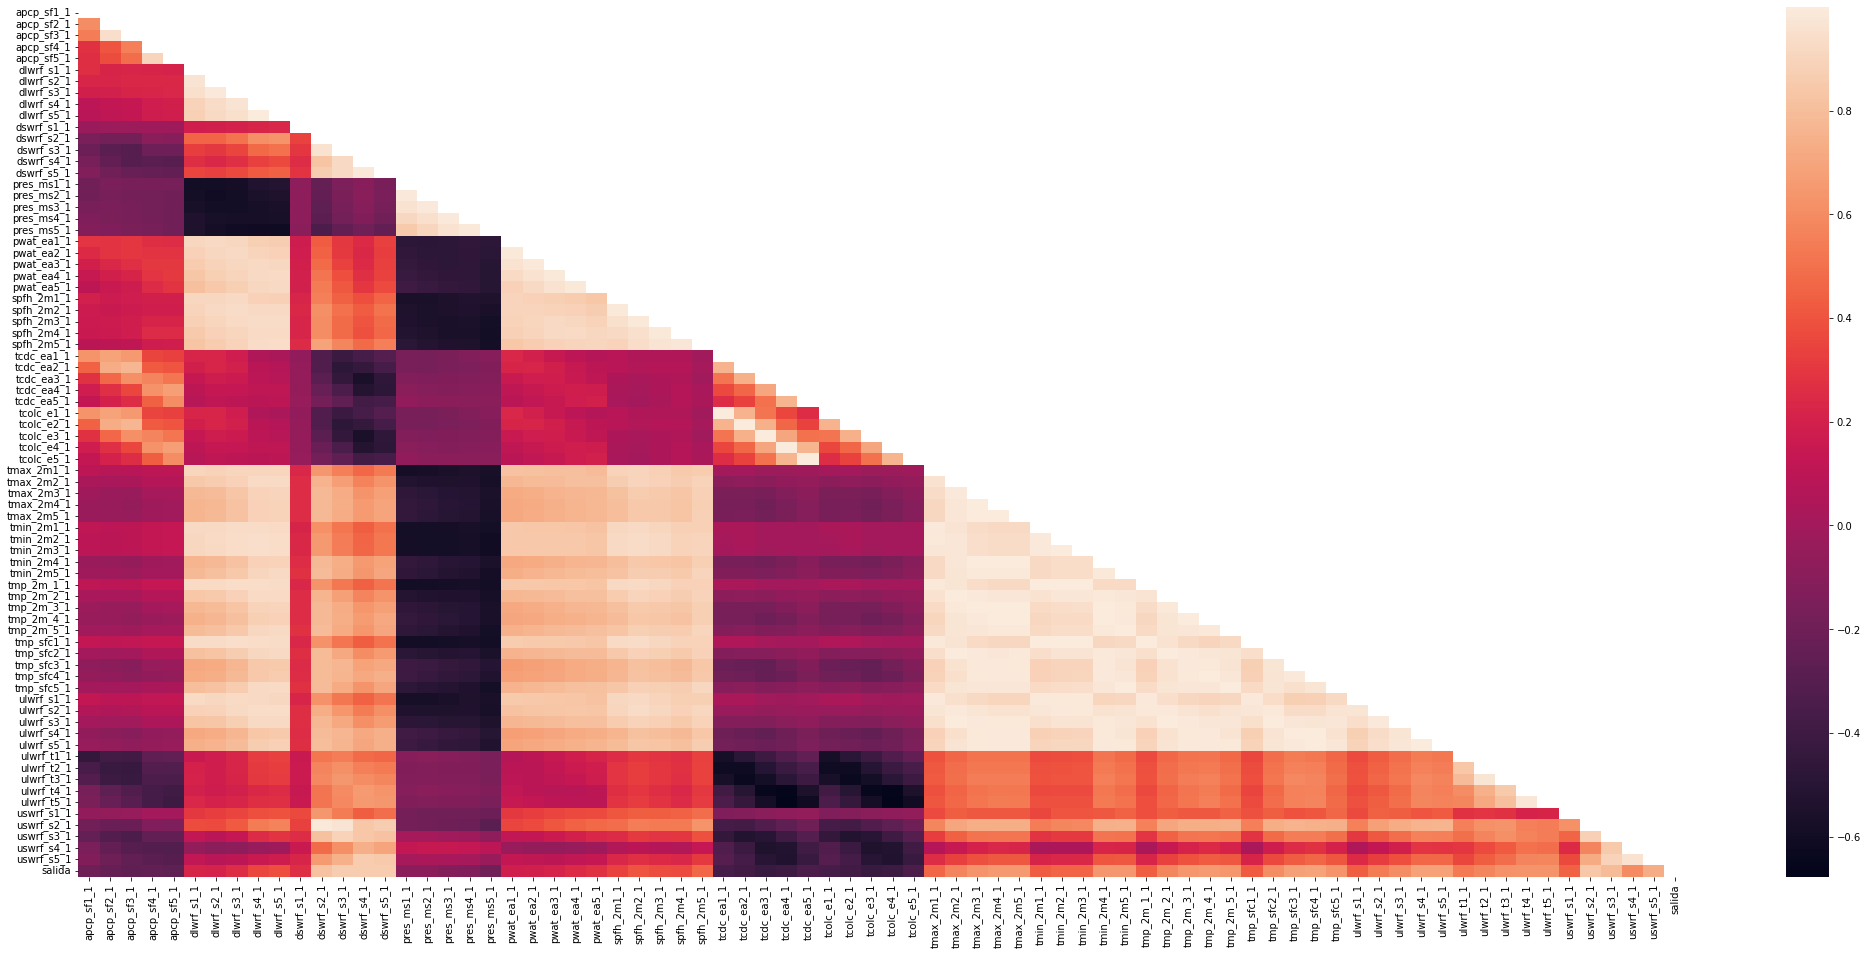

Estadístico de prueba: 7751358.776000544
Valor p: 0.0


0.0

In [5]:
# CORRELACION DE VARIABLES
def cor_matrix(df):
    #cor = disp_df.corr()[abs(disp_df.corr()) > 0.6]
    cor = disp_df.corr()
    mask = np.zeros_like(cor)
    mask[np.triu_indices_from(mask)] = True
    plt.figure(figsize=(36, 16))
    sns.heatmap(cor, mask=mask, annot=False)
    plt.show()

cor_matrix(disp_df)

# realizar el test de Bartlett
statistic, pvalue = bartlett(*disp_df.T.values)

# imprimir los resultados
print("Estadístico de prueba:", statistic)
print("Valor p:", pvalue)
pvalue
#aqui podemos ver que se rechaza la hipotesis nula de que es la matriz identidad, hay multicolinealidad, hay que eliminarla


**Comentarios derivados de la matriz de Correlación**

En este gráfioco miraremos a las zonas más claras (correlación positiva) o más oscuras (correlación negativa). De esta forma sabremos que variables afectan en gran medidas a otras. 

**Importante:** Cuando se eliminan características irrelevantes en K-NN, es importante identificar las características que tienen poca o ninguna correlación con la variable objetivo (es decir, la columna de etiquetas). Una forma común de hacerlo es calcular la correlación entre cada característica y la variable objetivo, y luego seleccionar las características con la mayor correlación.

Sin embargo, la correlación con otras características también puede ser un factor en la determinación de qué características eliminar. Por ejemplo, si tiene dos características altamente correlacionadas entre sí, es posible que desee eliminar una de ellas para evitar la multicolinealidad, que puede afectar negativamente el rendimiento de su modelo K-NN.

*   Mismos atributos su correlación es máxima = 1 (No muy potente).




## Separación en conjuntos de Entrenamiento, Validación y Test

In [6]:
#Creamos el conjunto de entrenamiento separando X e Y
#Columnas con datos de entrada
input_cols = disp_df.columns[:75]
#Número de filas correspondiente a los 8 primeros años - Entrenamiento
n_rows_train = int((disp_df_unicos.shape[0]*8)/12)

#Creamos el subset para entrenamiento
subset_df = disp_df.iloc[:n_rows_train]

#Datos de entrada y salida subset de entrenamiento
X_train_df = subset_df.iloc[:, :75]
y_train_df = subset_df.iloc[:, -1:]

# Crear el conjunto de validación 
#Número de filas correspondiente a los 2 años - Validación
n_rows_val = int((disp_df_unicos.shape[0]*2)/12)

start_index = disp_df_unicos.shape[0] - (n_rows_val*2)
end_index = disp_df_unicos.shape[0] - (n_rows_val)
subset_val_df = disp_df.iloc[start_index:end_index:,:]

X_val_df = subset_val_df.iloc[:, :75]
y_val_df = subset_val_df.iloc[:, -1:]

#Creamos el conjunto de test de manera manual
n_rows_test = int((disp_df_unicos.shape[0]*2)/12)

test_df = disp_df.iloc[-n_rows_test:, :]
print(test_df)

input_cols = disp_df.columns[:75]
output_col = disp_df.columns[-1]

X_test_df = test_df.loc[:, input_cols]
y_test_df = test_df.loc[:, output_col]





       apcp_sf1_1  apcp_sf2_1  apcp_sf3_1  apcp_sf4_1  apcp_sf5_1  dlwrf_s1_1  \
V3651    0.000000    0.000000    0.000000    0.000000    0.000000  223.426755   
V3652    0.000000    0.000000    0.000000    0.000000    0.000000  240.940893   
V3653    0.190909    0.235455    1.545455    3.620000    4.291818  334.705547   
V3654    0.372727    0.080000    0.152727    0.033636    0.067273  382.270236   
V3655    0.170909    0.088182    0.311818    0.426364    1.251818  367.165677   
...           ...         ...         ...         ...         ...         ...   
V4376    0.103636    0.031818    0.275455    1.363636    2.723636  290.259560   
V4377    0.042727    0.011818    0.005455    0.000000    0.000000  281.187456   
V4378    0.000000    0.000000    0.000000    0.000000    0.000000  258.991619   
V4379    0.000000    0.000000    0.000000    0.000000    0.000000  267.316595   
V4380    0.000000    0.000000    0.000000    0.000000    0.000000  265.567166   

       dlwrf_s2_1  dlwrf_s3

## Regresor Dummy

In [35]:
from sklearn.dummy import DummyRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


regr_mean = DummyRegressor(strategy="mean")
regr_mean.fit(X_train_df, y_train_df)
rmse_mean = np.sqrt(metrics.mean_squared_error(y_val_df, regr_mean.predict(X_val_df)))
r2_mean = metrics.r2_score(y_val_df, regr_mean.predict(X_val_df))

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_val_df, regr_mean.predict(X_val_df))

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_val_df, regr_mean.predict(X_val_df))

# Calculate R-squared score
r2_score = r2_score(y_val_df, regr_mean.predict(X_val_df))

print("MAE: ",mae)
print("MSE: ",mse)
print("R2: ",r2_score)



MAE:  6889559.834828299
MSE:  63181800761365.26
R2:  -0.0008890939076611204


### Explicación de estudio de métricas. 

Las métricas de evaluación son una forma de medir qué tan bien está funcionando un modelo de aprendizaje automático. En el caso de los modelos de regresión, estas métricas evalúan qué tan bien el modelo puede predecir los valores continuos de la variable objetivo.

Algunas de las métricas de evaluación comunes para los modelos de regresión son el error absoluto medio (MAE), el error cuadrático medio (MSE) y el coeficiente de determinación (R-cuadrado). El MAE y el MSE miden la distancia entre las predicciones del modelo y los valores reales, mientras que el R-cuadrado mide qué tan bien el modelo se ajusta a los datos.

Por otro lado, las métricas de evaluación de clasificación, como la precisión, la sensibilidad (recall), la especificidad y la puntuación F1, miden qué tan bien el modelo puede predecir las etiquetas de clase binarias o múltiples.

Entonces, como el modelo DummyRegressor es un modelo de regresión, no tiene sentido calcular las métricas de evaluación de clasificación, ya que estas están diseñadas para medir la capacidad del modelo para clasificar los datos en categorías discretas. En cambio, se deben usar las métricas de evaluación de regresión adecuadas para evaluar el rendimiento del modelo de regresión.


El **MAE** (Mean Absolute Error) mide la magnitud promedio de los errores en las predicciones del modelo. Es una medida de la distancia promedio entre las predicciones del modelo y los valores reales, y nos indica qué tan cerca están las predicciones del modelo de los valores reales en términos absolutos. Un valor bajo de MAE indica que el modelo tiene un buen rendimiento en la predicción de los valores reales.

El **MSE** (Mean Squared Error) mide el promedio de los errores al cuadrado en las predicciones del modelo. Al elevar los errores al cuadrado, el MSE da más peso a los errores grandes y menos peso a los errores pequeños. El MSE nos indica qué tan bien el modelo está prediciendo la variabilidad en los datos. Un valor bajo de MSE indica que el modelo tiene un buen rendimiento en la predicción de la variabilidad de los valores reales.

El **R-cuadrado** es una medida de cuánta varianza en los datos de la variable objetivo es explicada por el modelo. El R-cuadrado tiene un valor entre 0 y 1, y cuanto más cercano a 1, mejor es el rendimiento del modelo. Si el valor de R-cuadrado es 0, significa que el modelo no explica ninguna de la varianza en los datos, mientras que un valor de 1 significa que el modelo explica toda la varianza en los datos.

## K - NN

### Data Preparation

Para usar K-NN se debe preparar los datos correctamente. Las técnicas de aprendizaje automático que se basan en la medición de distancias, como las redes de neuronas, el k-NN y el SVM, requieren que los atributos estén **rescalados** para evitar que el atributo con mayor rango de valores tenga una influencia desproporcionada en la medida de distancia.

**Manejo de valores faltantes:** K-NN no maneja bien los valores faltantes, por lo que es importante manejarlos adecuadamente. Se pueden imputar los valores faltantes utilizando técnicas como la imputación de la media, la imputación de la mediana o mediante el uso de un modelo predictivo para imputar valores faltantes.

**Eliminación de características irrelevantes:** K-NN es sensible a las características irrelevantes, por lo que es importante eliminarlas antes de entrenar el modelo. Se pueden utilizar técnicas de selección de características, como el análisis de correlación o la información mutua, para identificar y eliminar características irrelevantes.

**Manejo de variables categóricas:** K-NN es un algoritmo basado en distancia que calcula distancias entre puntos de datos basándose en las características. Por lo tanto, es importante manejar adecuadamente las variables categóricas. Se pueden convertir las variables categóricas en variables numéricas utilizando técnicas como la codificación one-hot o la codificación de etiquetas.

In [13]:
#Evitamos que se produzca multicolinealidad: aquellas variables que tienen alta correlación con otras variables del modelo.

import pandas as pd

# Cargar la base de datos
disp_df_knn = pd.read_csv("disp_st27ns1.txt.bz2",compression="bz2",index_col=0)
comp_df_knn = pd.read_csv("comp_st27ns1.txt.bz2",compression="bz2",index_col=0)
# Calcular la matriz de correlación
corr_matrix = disp_df_knn.corr().abs()

# Seleccionar la matriz triangular superior
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Encontrar las características altamente correlacionadas - >.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(disp_df_knn.shape)
# Eliminar las características altamente correlacionadas
disp_df_knn.drop(to_drop, axis=1, inplace=True)

print(disp_df_knn.shape)

(4380, 76)
(4380, 25)


<ipython-input-13-fd4faa671302>:12: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [26]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

# Estandarizamos los datos de entrada de los conjuntos de entrenamiento, validación y test
ss = StandardScaler()
X_train_set_estandar = ss.fit_transform(X_train_df)
X_val_set_estandar = ss.fit_transform(X_val_df)
X_test_set_estandar = ss.fit_transform(X_test_df)

#Aquí se pierden las columnas por lo que han de ser recuperadas. 
columns = X_train_df.columns.values
X_train_df_estandar = pd.DataFrame(X_train_set_estandar, columns=columns)
X_val_df_estandar = pd.DataFrame(X_val_set_estandar, columns=columns)
X_test_df_estandar = pd.DataFrame(X_test_set_estandar, columns=columns)

print(X_train_df_estandar)
print(X_val_df_estandar)
print(X_test_df_estandar)

y_train_ndarray = y_train_df.values



#Eliminamos valores ausentes
missing_values = np.isnan(X_train_set_estandar)
if np.any(missing_values):
    # Impute missing values with mean imputation
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    X_train_df_estandar = imputer.fit_transform(X_train_df_estandar)

 



      apcp_sf1_1  apcp_sf2_1  apcp_sf3_1  apcp_sf4_1  apcp_sf5_1  dlwrf_s1_1  \
0      -0.294642   -0.255085   -0.275702   -0.300726   -0.307636   -0.607688   
1      -0.294642   -0.255085   -0.270946   -0.248605   -0.153840   -1.279998   
2      -0.141169   -0.236787   -0.254519   -0.291479   -0.304275   -0.843463   
3      -0.293519   -0.251273   -0.275702   -0.300726   -0.307636   -1.191572   
4      -0.294642   -0.255085   -0.275702   -0.300726   -0.307636   -1.577182   
...          ...         ...         ...         ...         ...         ...   
2915   -0.294642   -0.255085   -0.275702   -0.300726   -0.307636   -1.977959   
2916   -0.294642   -0.255085   -0.275702   -0.300726   -0.307636   -1.888606   
2917   -0.294642   -0.255085   -0.275702   -0.300726   -0.307636   -1.476844   
2918   -0.294642   -0.255085   -0.275702   -0.300726   -0.307636   -1.548013   
2919   -0.294642   -0.255085   -0.275702   -0.300726   -0.307636   -1.712972   

      dlwrf_s2_1  dlwrf_s3_1  dlwrf_s4_

## K-NN Execution


In [50]:
# Here, we set our model to KNN with k=5
clf_KNN = KNeighborsRegressor()

#We train it
clf_KNN.fit(X_train_df_estandar.values, y_train_df.values.flatten())


# We obtain predictions on the val set
y_val_pred = clf_KNN.predict(X_val_df_estandar)

# Calculate mean absolute error (MAE)
print(y_val_df.values.flatten()) 
      
print(y_val_pred)
mae = mean_absolute_error(y_val_df.values.flatten(), y_val_pred)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_val_df, y_val_pred)

print(type(y_val_pred.astype(int)[0]))
print(y_val_pred.astype(int))

# Calculate R-squared score
#r2 = r2_score(y_val_df.values.flatten(), y_val_pred.astype(int))


print("6889559.834828299")
print("MAE: ",mae)
print("MAE difference with Dummy", mae-66889559.834828299)
print("MSE: ",mse)
print("MSE difference with Dummy", mse-63181800761365.26)
#print("R2: ",r2)



/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


[ 3991800 12313200  9034500 10980000 12767400 10368000  1451100  8116800
 12311700 10316100 11017500  2552700 13047300 12868200 10141200 13366500
 13112400  3459600   868800  3798600  5346300 11014500 13977900  6637800
  8221800  5742900 14365200 14390400 13305300 13726200  5763900  1889700
  1748700 15181200 11770500  8137800 10821900  2848200  2310600 11347200
 15068100  9966900  4858200 17116200 16653900 15293100 14791500  8146200
 17562000 14540400 11147400  6211200 17061000 16573500 18832200 17291700
 15899700  2707800 16879800 20551500 20323200  5394600  7878000 21871200
 21298500 21176100 12266100  6456600  5476800 22479900 21954000  3056400
 20292000 20033400 19861500  4309200  9626100  9378600  3829800  1583700
 17917500 17320800 23672700 22510500  4897500  2260500 10355100 22966200
 22000200 17073600  3305100 23749200 24539700  9051000 25378500 25035000
 24867300 13528200   836700  5257800 25273500 26135400 19941900 21351000
 12171300 23834100 21785700  7821300 24575100 18037

## K-NN busqueda de mejores hiperparámetros

Los hiperparámetros a realizar búsqueda son los siguientes: 



*   K- número de vecinos (n_neighbors)
*   Weights (distance, uniform)
*   La métrica de distancia utilizada (por defecto, la distancia euclidiana)
*   El radio de búsqueda (solo para el caso de K-NN de radio).
*   El método de búsqueda de vecinos más cercanos (por defecto, un árbol KD).
*   El valor de p (para distancias de Minkowski).


La métrica de distancia utilizada en K-NN es una medida de similitud que se utiliza para determinar la distancia entre dos puntos de datos. La métrica de distancia por defecto en la mayoría de los casos es la distancia euclidiana, pero sklearn permite especificar otras métricas, como la distancia de Manhattan, la distancia de Minkowski, la distancia de Mahalanobis, entre otras.

El radio de búsqueda es un hiperparámetro que se utiliza solo en el caso de K-NN de radio. En este caso, en lugar de buscar los k vecinos más cercanos, se buscan todos los puntos dentro de un radio especificado alrededor del punto de consulta. Este radio puede ser un valor fijo o puede ser un parámetro a ajustar.

El método de búsqueda de vecinos más cercanos es un algoritmo utilizado para encontrar los k vecinos más cercanos a un punto de consulta. Sklearn proporciona varios métodos de búsqueda, como el método de árbol KD, el método de búsqueda de fuerza bruta, el método de bola de árbol, entre otros. El método de árbol KD es el método por defecto utilizado en sklearn debido a su eficiencia en espacios de alta dimensión.

El valor de p es un parámetro utilizado en la distancia de Minkowski, que es una generalización de la distancia euclidiana y de la distancia de Manhattan. Si p=1, se utiliza la distancia de Manhattan, si p=2, se utiliza la distancia euclidiana, y para otros valores de p se utiliza la distancia de Minkowski. Este parámetro puede ser un hiperparámetro a ajustar para encontrar el valor óptimo que se ajuste a los datos.


Realizaremos dos bloques: 

1.   Primer bloque: n_neighbors, weights, métrica de distancia, método de búsqueda. 
2.   Segundo bloque: radio de búsqueda aplicando KNN de radio, weights, métrica de distancia (modificar valor p), método de búsqueda. 

¿Hacemos Kfold?



In [51]:
#En este apartado haremos una búsqueda de los mejores hiperparámetros 
#Creamos las listas en las que haremos el análisis

weights=['uniform', 'distance']
distance = ['euclidean','manhattan','minkowski']





### Matriz de  Confusión asociada

KeyboardInterrupt: ignored

Error in callback <function _draw_all_if_interactive at 0x7f838a619ee0> (for post_execute):


KeyboardInterrupt: ignored

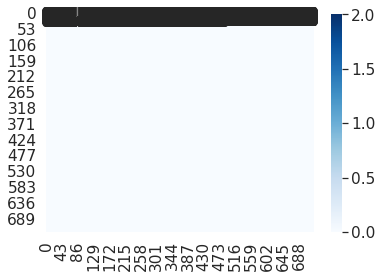

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_df, y_test_pred)
np.set_printoptions(precision=2)

# Plot confusion matrix
sns.set(font_scale=1.4) # for label size
sns.heatmap(cnf_matrix, annot=True, annot_kws={"size": 16}, cmap="Blues", fmt='g') # font size
